# <a id='0'>Team 4:Climate Change Belief Analysis 2022</a>

# Table of Contents

1. [Introduction](#1.-Introduction)

    1.1 [Overview](##1.1-Overview)
    
    1.2. [Problem Statement](##1.2-Problem-Statement)
2. [Comet Experiment](#2.-Comet-Experiment)
3. [Loading Dependencies](#3.-Loading-Dependencies)
4. [Exploratory Data Analysis](#4.-Exploratory-Data-Analysis)
5. [Data Preprocessing](#5.-Data-Preprocessing)
6. [Modelling](#6.-Modelling)
7. [Conclusion](#7.-Conclusion)
8. [Recommendations](#8.-Recommendations)



# 1. Introduction

   ## 1.1 Overview

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, we are creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:

Class Description
* 2 News: the tweet links to factual news about climate change
* 1 Pro: the tweet supports the belief of man-made climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate change

Variable definitions
- sentiment: Sentiment of tweet
- message: Tweet body
- tweetid: Twitter unique id

   ## 1.2 Problem Statement

# 2. Comet Experiment

In [1]:
!pip3 install comet_ml

In [2]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="CL3r4k2Kr1MFTRdavZUxjrBSy",
    project_name="team-12-advanced-classification-sentiment-analysis",
    workspace="jeniffermukami",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/jeniffermukami/team-12-advanced-classification-sentiment-analysis/ffc788fc487144ebba90a64b1fb447d5



# 3. Loading Dependencies

In [78]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import regexp_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
import math
from sklearn import metrics
from sklearn.metrics import classification_report

%matplotlib inline
# set plot style
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [4]:
#loading the data
df_test =pd.read_csv('test_with_no_labels.csv')
df_tr = pd.read_csv('train.csv')

# 4. Exploratory Data Analysis

In [5]:
df_tr.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


Looking at the top 5 rows of our data we can see all our features as well as the type of data we are working with.

Our features are:
  -sentiment
  -message
  
   -tweet id

In [6]:
df_tr.shape

(15819, 3)

The shape command shows that we have 15819 rows of data and 3 features.

In [7]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


The info command confrirms our categorical and numericalfeatures,and as expected the message feature is categorical while the tweetid and sentiment are numerical. 

We will now check for  the null values appearing in each feature

In [8]:
df_tr.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

We have no null values in the data

we will now print a list of all sentiment types we have in our data.

In [10]:
type_labels = list(df_tr.sentiment.unique())
print(type_labels)

[1, 2, 0, -1]


Let's look at how many data samples we have for each of the different sentiment types

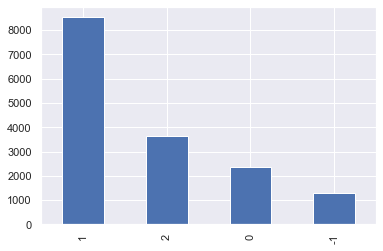

In [11]:
df_tr['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

From the bar graph above it can be seen that most people believe in climate change,while only a few fail to believe in man-made climate change.Our data is imbalanced which is a problem because algorithms wants balanced data,unequal distribution means the classifier is exposed to far more observation from class label 1 and far less observations from classlabel -1 ,This will mea hat the classifier will be better in making predictions in tweet messages from class label 1than those in class label-1.

### Key insights from the EDA

# 5. Data Preprocessing

__Preprocessing for the train dataset__

## Text Cleaning

### Removing Noise

For our data set we will follow the following steps 
 * removing Removing hashtags, mentions, and links
 * making everything lower case
 * removing punctuation

In [13]:
df_train =df_tr
df_train

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001
15815,2,RT @washingtonpost: How climate change could b...,17856
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732


Removing url

In [14]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_train['message'] = df_train['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

remove mentions

In [15]:
df_train['message'] 

0        PolySciMajor EPA chief doesn't think carbon di...
1        It's not like we lack evidence of anthropogeni...
2        RT @RawStory: Researchers say we have three ye...
3        #TodayinMaker# WIRED : 2016 was a pivotal year...
4        RT @SoyNovioDeTodas: It's 2016, and a racist, ...
                               ...                        
15814    RT @ezlusztig: They took down the material on ...
15815    RT @washingtonpost: How climate change could b...
15816    notiven: RT: nytimesworld :What does Trump act...
15817    RT @sara8smiles: Hey liberals the climate chan...
15818    RT @Chet_Cannon: .@kurteichenwald's 'climate c...
Name: message, Length: 15819, dtype: object

Apply the tweet tokenization

In [17]:
#tt = TweetTokenizer()
#df_train['message'].apply(tt.tokenize)

making everything lowercase 

In [18]:
df_train['message'] = df_train['message'].str.lower()

Removing punctuation.

In [19]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [20]:
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [21]:
df_train['message'] = df_train['message'].apply(remove_punctuation)


In [22]:
df_train

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rt rawstory researchers say we have three year...,698562
3,1,todayinmaker wired 2016 was a pivotal year in...,573736
4,1,rt soynoviodetodas its 2016 and a racist sexis...,466954
...,...,...,...
15814,1,rt ezlusztig they took down the material on gl...,22001
15815,2,rt washingtonpost how climate change could be ...,17856
15816,0,notiven rt nytimesworld what does trump actual...,384248
15817,-1,rt sara8smiles hey liberals the climate change...,819732


__Preprocessing for  the test dataset__

In [23]:
df_test =pd.read_csv('test_with_no_labels.csv')
df_test

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \r\nPu...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928
...,...,...
10541,"RT @BrittanyBohrer: Brb, writing a poem about ...",895714
10542,2016: the year climate change came home: Durin...,875167
10543,RT @loop_vanuatu: Pacific countries positive a...,78329
10544,"RT @xanria_00018: You’re so hot, you must be t...",867455


In [24]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_test['message'] = df_test['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [26]:
#tt = TweetTokenizer()
#df_test['message'].apply(tt.tokenize)

In [27]:
df_test['message'] = df_test['message'].str.lower()

In [28]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [29]:
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [30]:
df_test['message'] = df_test['message'].apply(remove_punctuation)


__initialize the count vectorizer__

In [31]:
#initilize count vectorizer
y = df_train['sentiment']
X_train,X_test,y_train,y_test =train_test_split(df_train['message'],y,test_size=0.33,random_state = 53)
betterVect = CountVectorizer(stop_words='english', 
                             min_df=2, 
                             max_df=0.5, 
                             ngram_range=(1, 1))


In [32]:
#transform the training data using only the 'message' column values
count_train =betterVect.fit_transform(X_train.values)

In [33]:
#transform the test data using only the 'message' column values
count_test=betterVect.transform(X_test.values)
counteer_test = betterVect.transform(df_test['message'])


In [34]:
#print the first 10 features of the count_vectorizer
print(betterVect.get_feature_names()[:100])

['10', '100', '1000', '100000', '1000s', '101', '105', '109c', '10yrs', '11', '110', '115', '12', '125', '13', '14', '145', '15', '150', '15c', '16', '17', '170', '175', '18', '19', '1957', '1963', '1968', '1970s', '1990', '1990s', '1991', '1followernodad', '1o5c', '1st', '1starfleetcadet', '20', '200', '2000', '200000', '2008', '2009', '200millionyearold', '2010', '20102017', '2011', '2012', '2013', '2014', '2015', '2016', '2016s', '2017', '2018', '202', '2020', '2030', '2045', '2050', '21', '2100', '21cf', '21logician', '21st', '22', '23', '2322', '24', '25', '25th', '26', '27', '28', '280', '29', '2c', '2day', '2nd', '30', '300000', '32', '320', '3200', '320000', '33', '34', '35', '350', '37', '3novices', '3rd', '40', '400', '44', '45', '46', '48', '4corners', '50']


__TF-IDF Vectorizer__

TF-IDF stands for Term Frequency-Inverse Document Frequency.It is a commonly used NLP model that helps you determine the most important words in each document in the corpus.The idea behind TFIDF is that each corpus may have shared words beyond just the stopwords.These common words are like stop words and should be removed or atleast downweighted in importance.

In [35]:
tfidf=TfidfVectorizer(stop_words='english',max_df =0.7)

In [36]:
#Transform training data
tfidf_train =tfidf.fit_transform(X_train)

In [37]:
tfidf_test =tfidf.transform(X_test)

In [38]:
print(tfidf.get_feature_names()[:100])

['000005', '009barca', '010536', '012', '02', '02cents0', '0519am', '07', '094', '0bamas', '0c', '0x526978', '10', '100', '1000', '100000', '10000yr', '1000s', '1001', '100daysofshame', '100h', '100isnow', '100s', '100th', '100x', '100yearold', '101', '1010', '105', '106', '10950', '109c', '10c', '10most', '10yrs', '10ã', '11', '110', '1100', '1110c', '1111', '1123', '1130', '114', '115', '11500', '11pm', '11th', '12', '1200', '120k', '1224', '125', '12am', '12balboa', '12th', '13', '130', '1306chomley', '131', '13690', '14', '140', '1400', '140b', '1430', '1431', '145', '1488ã', '15', '150', '15000', '150000', '15c', '15mm', '15th', '15ã', '16', '160', '164', '1645ã', '16yearold', '17', '170', '170billion', '17352', '175', '1778', '17mohdsajid', '17posc225', '17year', '18', '18001930', '180bn', '182', '1840s', '1856', '1875', '18yearlong', '19']


In [39]:
#print the first 20 vectors of tfidf training data
print(tfidf_train.A[:10])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [40]:
#create tfidf vectorizer df
tfidf_df =pd.DataFrame(tfidf_train.A,columns=tfidf.get_feature_names())
print(tfidf_df.head())

   000005  009barca  010536  012   02  02cents0  0519am   07  094  0bamas  \
0     0.0       0.0     0.0  0.0  0.0       0.0     0.0  0.0  0.0     0.0   
1     0.0       0.0     0.0  0.0  0.0       0.0     0.0  0.0  0.0     0.0   
2     0.0       0.0     0.0  0.0  0.0       0.0     0.0  0.0  0.0     0.0   
3     0.0       0.0     0.0  0.0  0.0       0.0     0.0  0.0  0.0     0.0   
4     0.0       0.0     0.0  0.0  0.0       0.0     0.0  0.0  0.0     0.0   

   ...   เล  และ   ได  と通知した  どうなる米国  スタリん時代のソ連や毛沢東の文化大革命並のサイエンスに政治的介入だ  \
0  ...  0.0  0.0  0.0    0.0     0.0                                0.0   
1  ...  0.0  0.0  0.0    0.0     0.0                                0.0   
2  ...  0.0  0.0  0.0    0.0     0.0                                0.0   
3  ...  0.0  0.0  0.0    0.0     0.0                                0.0   
4  ...  0.0  0.0  0.0    0.0     0.0                                0.0   

   地球温暖化会議  気候変動との表現を削除しないと予算を貰えない  申請書のアブストラクトに  米国政府はある研究者に連絡して  
0      0.0        

# 6. Modelling

This section shows the process used when selecting the machine learning algorithm to be used to classify the different climate change sentiments.There are various machine learning techniques that can be used to solve different problems,Hence it very pivotal to select a model that best suits the project objective.

__The following classification algorithms are used to train the model,namely__

   1.Naive Bayes Model
   
   
   
   
   
   
   



### 6.1. Naive Bayes Model


Naive bayes is most commonly used for testing NLP classification because of its basis in probability.Naive bayes algorithm attempts to answe the question 'Given a particular piece of data how likely is the outcome?'
Each word acts as a feature from our count vectorizer helping classify our message using probability.

In [79]:
from sklearn.naive_bayes import MultinomialNB

MultinomialNB works well with count vectorizer as it expects integer inputs

__modelling with the count vectors__

In [80]:
#initialize class
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train,y_train)

MultinomialNB()

In [81]:
nb_pred=nb_classifier.predict(count_test)

__Assessing Model Performance__

After making predictions we need a way to find out how effective our predictions were,There are several performance metrics
which are available to us in sklearn.
  * accuracy score
  * confusion matrix
  * 

__accuracy score__

In [82]:
accuracy = metrics.accuracy_score(y_test,nb_pred)
accuracy
                                  

0.7090595671327332

__confusion matrix__

To get a better view of how our classification model is performing,a confusio matrix iscalculated to see the type of errors made.

In [84]:
metrics.confusion_matrix(y_test, nb_pred)

array([[ 171,   58,  176,   29],
       [  33,  309,  350,   90],
       [  39,  174, 2267,  337],
       [  15,   11,  207,  955]], dtype=int64)

This doesn't look very nice - let's convert it into a dataframe and add the appropriate labels to make it clear which value is which.The matrix orders the rows and columns in a sorted fashion according to the labels,we will then give the matrix the appropriate labels.


In [86]:
labels = ['2: News', '1: Pro','0: Neutral', '-1: Anti']

pd.DataFrame(data=metrics.confusion_matrix(y_test, nb_pred), index=labels, columns=labels)

,2: News,1: Pro,0: Neutral,-1: Anti
2: News,171,58,176,29
1: Pro,33,309,350,90
0: Neutral,39,174,2267,337
-1: Anti,15,11,207,955


Based on the confusion matrix shown here:
    
    
    
  ......  

F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall and there is an uneven class distribution likein our data.

In [102]:
f1 =metrics.f1_score(y_test, nb_pred, average='micro')
f1


0.7090595671327331

__Classification Report__

The Classification Report gives us more information on where our model is going wrong - looking specifically at the performance caused by Type I & II errors.

In [93]:
print('Classification Report')
print(classification_report(y_test, nb_pred, target_names=['2: News', '1: Pro','0: Neutral', '-1: Anti']))

Classification Report
              precision    recall  f1-score   support

     2: News       0.66      0.39      0.49       434
      1: Pro       0.56      0.40      0.46       782
  0: Neutral       0.76      0.80      0.78      2817
    -1: Anti       0.68      0.80      0.73      1188

    accuracy                           0.71      5221
   macro avg       0.66      0.60      0.62      5221
weighted avg       0.70      0.71      0.70      5221



In [91]:
#F1 = metrics.f1_score(y_test,nb_pred)

__Creating a submission file__

In [45]:
tester= nb_classifier.predict(counteer_test)


In [46]:
af=pd.DataFrame(tester,columns=['sentiment'])
af.head

<bound method NDFrame.head of        sentiment
0              1
1              1
2              1
3              1
4              0
...          ...
10541          1
10542          1
10543          2
10544          0
10545          1

[10546 rows x 1 columns]>

In [47]:
output=pd.DataFrame({'tweetid':df_test['tweetid']})
submission=output.join(af)

In [56]:
#submission

In [48]:
submission.to_csv('submission.csv',index=False)
submission

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0
...,...,...
10541,895714,1
10542,875167,1
10543,78329,2
10544,867455,0


__modelling with the tfidf vectors__

In [49]:
nb_classifier.fit(tfidf_train,y_train)

MultinomialNB()

In [50]:
#create the predicted tags
pred = nb_classifier.predict(tfidf_test)

__classification metrics__

In [53]:
#calculate the accuracy scores 
score=metrics.accuracy_score(y_test,pred)
print(score)

0.6389580540126413


### Logging results to comet

In [98]:
#saving metrics for logging
accuracy = metrics.accuracy_score(y_test,pred)
accuracy

0.7090595671327332

In [103]:
#savig metric for logging
params ={"random_state":53,
        "model_type ":"Naive_bayes"}

nb_metrics ={"Accuracy":accuracy,
            "f1_score":f1}


In [105]:
#log parameters and results
experiment.log_parameters(params)
experiment.log_metrics(nb_metrics)


In [106]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/jeniffermukami/team-12-advanced-classification-sentiment-analysis/ffc788fc487144ebba90a64b1fb447d5
COMET INFO:   Metrics:
COMET INFO:     Accuracy : 0.7090595671327332
COMET INFO:     f1_score : 0.7090595671327331
COMET INFO:   Parameters:
COMET INFO:     alpha         : 1.0
COMET INFO:     class_prior   : 1
COMET INFO:     fit_prior     : True
COMET INFO:     model_type    : Naive_bayes
COMET INFO:     neg_label     : 0
COMET INFO:     norm          : l2
COMET INFO:     pos_label     : 1
COMET INFO:     random_state  : 53
COMET INFO:     smooth_idf    : True
COMET INFO:     sparse_output : False
COMET INFO:     sublinear_tf  : False
COMET INFO:     use_idf       : True
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET 

In [107]:
experiment.display()

# 7. Conclusion

# 8. Recommendations